# none standard scaler

스케일링도 계산이기 때문에 스케일링을 안했을 때, 정확도가 높게 나온다면 스케일링 진행 x

In [72]:
import pandas as pd
import numpy as np

wash_data = pd.read_csv('./wash.csv', header=None)
brush_data = pd.read_csv('./brush.csv', header=None)
walk_data = pd.read_csv('./walk.csv',header=None)
eat_data = pd.read_csv('./eat.csv', header=None)
sit_data = pd.read_csv('./sit.csv', header=None)
stand_data = pd.read_csv('./stand.csv', header=None)
dummy_data = pd.read_csv('./dummy.csv', header=None)

dummy_data[16] = 0
wash_data[16] = 1
brush_data[16] = 2
eat_data[16] = 3
walk_data[16] = 4
sit_data[16] = 5
stand_data[16] = 6

dummy_arr = dummy_data.to_numpy()
wash_arr = wash_data.to_numpy()
brush_arr = brush_data.to_numpy()
walk_arr = walk_data.to_numpy()
eat_arr = eat_data.to_numpy()
sit_arr = sit_data.to_numpy()
stand_arr = stand_data.to_numpy()

tot_data = np.concatenate((dummy_arr, wash_arr, brush_arr, walk_arr, eat_arr, sit_arr, stand_arr))
train_x = tot_data[:,:-1]
train_y = tot_data[:,-1:]


In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

from sklearn.svm import SVC
svm_clf = SVC(random_state=42, gamma = 0.01)

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, train_x, train_y.flatten(), cv=skf)

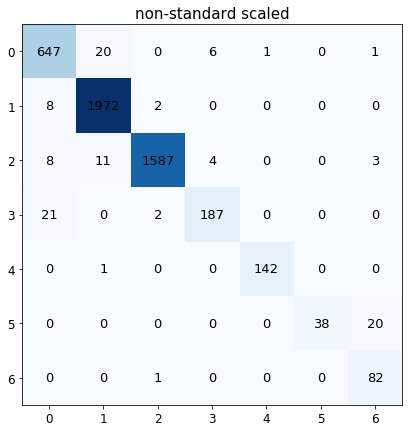

In [81]:
from sklearn.metrics import confusion_matrix

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train_y.flatten(), y_train_pred)

# Plot confusion matrix
plt.title("non-standard scaled", fontsize=15)
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center', fontsize=13)
#plt.xlabel(['dummy', 'wash', 'brush', 'eat', 'walk', 'stand', 'sit'])
# plt.xlabel("kmeans label")
# plt.ylabel("truth label")
plt.show()

* sit, stand 를 합쳐서 진행하는 것도 좋을 것 같음.
* 두개를 자세히 구분할 필요 없음 

697 개의 커널

In [82]:
from sklearn.svm import SVC
from micromlgen import port
svm_clf = SVC(random_state=42, gamma = 0.01).fit(train_x, train_y.flatten())
print(port(svm_clf))

#pragma once
/**
 * Compute kernel between feature vector and support vector.
 * Kernel type: rbf
 */
double compute_kernel(double x[16], ...) {
    va_list w;
    double kernel = 0.0;
    va_start(w, 16);
    for (uint16_t i = 0; i < 16; i++)
            kernel += pow(x[i] -  va_arg(w, double) , 2);
        kernel = exp(-0.01 * kernel);
    return kernel;
}
/**
 * Predict class for features vector
 */
int predict(double *x) {
    double kernels[697] = { 0 };
    double decisions[21] = { 0 };
    int votes[7] = { 0 };
        kernels[0] = compute_kernel(x,   10.38  , 9.91  , 1.89  , 2.42  , 0.28  , 0.24  , 0.36  , 0.05  , 0.01  , 0.07  , 0.66  , 0.09  , 0.65  , -0.04  , -0.06  , 0.07 );
        kernels[1] = compute_kernel(x,   10.19  , 9.93  , -1.08  , 0.37  , 1.15  , 1.32  , 1.5  , 0.69  , 1.47  , 0.63  , 0.46  , 0.74  , 0.37  , -0.63  , 0.08  , 0.17 );
        kernels[2] = compute_kernel(x,   10.24  , 7.89  , 4.33  , -2.43  , 2.0  , 2.24  , 3.1  , -3.58  , -5.56  , 5.45  , -0.8  , -0

## stand, sit -> 합침
* 클래스의 개수가 줄으면 커널의 수가 주는 듯 함

클래스를 줄임 -> svm 커널 개수 줄음

In [83]:
import pandas as pd
import numpy as np

wash_data = pd.read_csv('./wash.csv', header=None)
brush_data = pd.read_csv('./brush.csv', header=None)
walk_data = pd.read_csv('./walk.csv',header=None)
eat_data = pd.read_csv('./eat.csv', header=None)
sit_data = pd.read_csv('./sit.csv', header=None)
stand_data = pd.read_csv('./stand.csv', header=None)
dummy_data = pd.read_csv('./dummy.csv', header=None)

dummy_data[16] = 0
wash_data[16] = 1
brush_data[16] = 2
eat_data[16] = 3
walk_data[16] = 4
sit_data[16] = 5
stand_data[16] = 5

dummy_arr = dummy_data.to_numpy()
wash_arr = wash_data.to_numpy()
brush_arr = brush_data.to_numpy()
walk_arr = walk_data.to_numpy()
eat_arr = eat_data.to_numpy()
sit_arr = sit_data.to_numpy()
stand_arr = stand_data.to_numpy()

tot_data = np.concatenate((dummy_arr, wash_arr, brush_arr, walk_arr, eat_arr, sit_arr, stand_arr))
train_x = tot_data[:,:-1]
train_y = tot_data[:,-1:]


In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

from sklearn.svm import SVC
svm_clf = SVC(random_state=42, gamma = 0.01)

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, train_x, train_y.flatten(), cv=skf)

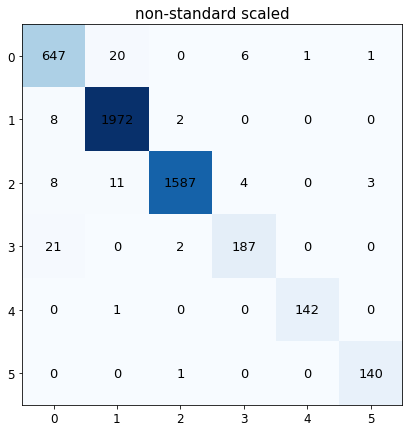

In [85]:
from sklearn.metrics import confusion_matrix

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train_y.flatten(), y_train_pred)

# Plot confusion matrix
plt.title("non-standard scaled", fontsize=15)
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center', fontsize=13)
#plt.xlabel(['dummy', 'wash', 'brush', 'eat', 'walk', 'stand', 'sit'])
# plt.xlabel("kmeans label")
# plt.ylabel("truth label")
plt.show()

In [89]:
from sklearn.svm import SVC
from micromlgen import port
svm_clf = SVC(random_state=42, gamma = 0.01).fit(train_x, train_y.flatten())
print(port(svm_clf))

#pragma once
/**
 * Compute kernel between feature vector and support vector.
 * Kernel type: rbf
 */
double compute_kernel(double x[16], ...) {
    va_list w;
    double kernel = 0.0;
    va_start(w, 16);
    for (uint16_t i = 0; i < 16; i++)
            kernel += pow(x[i] -  va_arg(w, double) , 2);
        kernel = exp(-0.01 * kernel);
    return kernel;
}
/**
 * Predict class for features vector
 */
int predict(double *x) {
    double kernels[619] = { 0 };
    double decisions[15] = { 0 };
    int votes[6] = { 0 };
        kernels[0] = compute_kernel(x,   10.38  , 9.91  , 1.89  , 2.42  , 0.28  , 0.24  , 0.36  , 0.05  , 0.01  , 0.07  , 0.66  , 0.09  , 0.65  , -0.04  , -0.06  , 0.07 );
        kernels[1] = compute_kernel(x,   10.24  , 7.89  , 4.33  , -2.43  , 2.0  , 2.24  , 3.1  , -3.58  , -5.56  , 5.45  , -0.8  , -0.8  , 0.88  , 1.66  , 0.17  , -1.23 );
        kernels[2] = compute_kernel(x,   10.41  , 7.54  , 3.99  , -2.44  , 2.31  , 3.46  , 4.15  , -1.29  , -1.74  , 7.23  , -0.16  

커널 개수 449 -> 클래스를 줄이는 것이 커널 줄이는 데 도움이 됨

**dummy 늘리니까 600개 이상으로 바뀜**

## 3개 클래스를 제외한 나머지 합침

* 손씻기, 밥먹기, 이빨닦기 -> 클래스 나눔
* 나머지 -> 함침


In [90]:
import pandas as pd
import numpy as np

wash_data = pd.read_csv('./wash.csv', header=None)
brush_data = pd.read_csv('./brush.csv', header=None)
walk_data = pd.read_csv('./walk.csv',header=None)
eat_data = pd.read_csv('./eat.csv', header=None)
sit_data = pd.read_csv('./sit.csv', header=None)
stand_data = pd.read_csv('./stand.csv', header=None)
dummy_data = pd.read_csv('./dummy.csv', header=None)

dummy_data[16] = 0
wash_data[16] = 1
brush_data[16] = 2
eat_data[16] = 3
walk_data[16] = 0
sit_data[16] = 0
stand_data[16] = 0

dummy_arr = dummy_data.to_numpy()
wash_arr = wash_data.to_numpy()
brush_arr = brush_data.to_numpy()
walk_arr = walk_data.to_numpy()
eat_arr = eat_data.to_numpy()
sit_arr = sit_data.to_numpy()
stand_arr = stand_data.to_numpy()

tot_data = np.concatenate((dummy_arr, wash_arr, brush_arr, walk_arr, eat_arr, sit_arr, stand_arr))
train_x = tot_data[:,:-1]
train_y = tot_data[:,-1:]


In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

from sklearn.svm import SVC
svm_clf = SVC(random_state=42, gamma = 0.01)

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, train_x, train_y.flatten(), cv=skf)

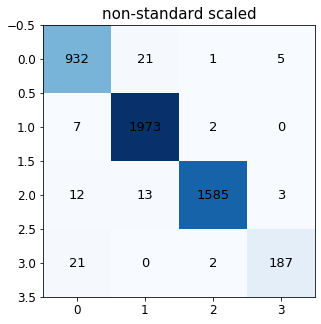

In [93]:
from sklearn.metrics import confusion_matrix

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train_y.flatten(), y_train_pred)

# Plot confusion matrix
plt.title("non-standard scaled", fontsize=15)
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center', fontsize=13)
#plt.xlabel(['dummy', 'wash', 'brush', 'eat', 'walk', 'stand', 'sit'])
# plt.xlabel("kmeans label")
# plt.ylabel("truth label")
plt.show()

In [96]:
from sklearn.svm import SVC
from micromlgen import port
svm_clf = SVC(random_state=42, gamma = 0.01).fit(train_x, train_y.flatten())
print(port(svm_clf))

#pragma once
/**
 * Compute kernel between feature vector and support vector.
 * Kernel type: rbf
 */
double compute_kernel(double x[16], ...) {
    va_list w;
    double kernel = 0.0;
    va_start(w, 16);
    for (uint16_t i = 0; i < 16; i++)
            kernel += pow(x[i] -  va_arg(w, double) , 2);
        kernel = exp(-0.01 * kernel);
    return kernel;
}
/**
 * Predict class for features vector
 */
int predict(double *x) {
    double kernels[571] = { 0 };
    double decisions[6] = { 0 };
    int votes[4] = { 0 };
        kernels[0] = compute_kernel(x,   10.38  , 9.91  , 1.89  , 2.42  , 0.28  , 0.24  , 0.36  , 0.05  , 0.01  , 0.07  , 0.66  , 0.09  , 0.65  , -0.04  , -0.06  , 0.07 );
        kernels[1] = compute_kernel(x,   10.43  , 9.8  , 1.7  , 1.22  , 0.78  , 2.0  , 1.97  , -1.19  , -3.87  , 1.28  , -0.76  , -0.98  , 0.83  , 0.91  , -0.26  , -0.76 );
        kernels[2] = compute_kernel(x,   10.24  , 7.89  , 4.33  , -2.43  , 2.0  , 2.24  , 3.1  , -3.58  , -5.56  , 5.45  , -0.8  , -

# Standard scaler

## 각 클래스 구분에 대한 정확도

In [160]:
wash_data = pd.read_csv('./wash.csv', header=None)
brush_data = pd.read_csv('./brush.csv', header=None)
walk_data = pd.read_csv('./walk.csv',header=None)
eat_data = pd.read_csv('./eat.csv', header=None)
sit_data = pd.read_csv('./sit.csv', header=None)
stand_data = pd.read_csv('./stand.csv', header=None)
dummy_data = pd.read_csv('./dummy.csv', header=None)

dummy_data[16] = 0
wash_data[16] = 1
brush_data[16] = 2
eat_data[16] = 3
walk_data[16] = 4
sit_data[16] = 5
stand_data[16] = 6

wash_arr = wash_data.to_numpy()
brush_arr = brush_data.to_numpy()
walk_arr = walk_data.to_numpy()
eat_arr = eat_data.to_numpy()
sit_arr = sit_data.to_numpy()
stand_arr = stand_data.to_numpy()

tot_data = np.concatenate((dummy_data, wash_arr, brush_arr, walk_arr, eat_arr, sit_arr, stand_arr))
tot_data.shape

train_x = tot_data[:,:-1]
train_y = tot_data[:,-1:]

In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_x = scaler.fit_transform(train_x)

In [162]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


from sklearn.svm import SVC
svm_clf = SVC(random_state=42, gamma = 0.01)

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, scaled_x, train_y.flatten(), cv=skf)

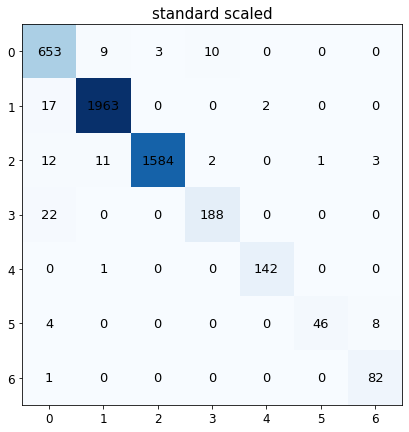

In [163]:
from sklearn.metrics import confusion_matrix

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train_y.flatten(), y_train_pred)

# Plot confusion matrix
plt.title("standard scaled", fontsize=15)
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center', fontsize=13)
#plt.xlabel(['dummy', 'wash', 'brush', 'eat', 'walk', 'stand', 'sit'])
# plt.xlabel("kmeans label")
# plt.ylabel("truth label")
plt.show()

In [164]:
from sklearn.svm import SVC
from micromlgen import port
svm_clf = SVC(random_state=42, gamma = 0.1).fit(scaled_x, train_y.flatten())
print(port(svm_clf))

#pragma once
/**
 * Compute kernel between feature vector and support vector.
 * Kernel type: rbf
 */
double compute_kernel(double x[16], ...) {
    va_list w;
    double kernel = 0.0;
    va_start(w, 16);
    for (uint16_t i = 0; i < 16; i++)
            kernel += pow(x[i] -  va_arg(w, double) , 2);
        kernel = exp(-0.1 * kernel);
    return kernel;
}
/**
 * Predict class for features vector
 */
int predict(double *x) {
    double kernels[786] = { 0 };
    double decisions[21] = { 0 };
    int votes[7] = { 0 };
        kernels[0] = compute_kernel(x,   -0.32711135  , 1.479286411  , -1.771477766  , 0.308436687  , -0.8813708  , -0.806022849  , -0.33571828  , 0.699627861  , 0.507197352  , 0.04765025  , 1.846181324  , 1.677610696  , 0.252491119  , -0.329992536  , 0.449085616  , 0.393453132 );
        kernels[1] = compute_kernel(x,   -0.246591841  , 1.102968293  , 0.025782598  , -0.2040799  , -0.369160068  , -0.197966947  , 1.34626029  , 0.055592919  , -0.758376427  , 1.055904783  , -0

## 클래스 합침

In [104]:
import pandas as pd
import numpy as np

wash_data = pd.read_csv('./wash.csv', header=None)
brush_data = pd.read_csv('./brush.csv', header=None)
walk_data = pd.read_csv('./walk.csv',header=None)
eat_data = pd.read_csv('./eat.csv', header=None)
sit_data = pd.read_csv('./sit.csv', header=None)
stand_data = pd.read_csv('./stand.csv', header=None)
dummy_data = pd.read_csv('./dummy.csv', header=None)

dummy_data[16] = 0
wash_data[16] = 1
brush_data[16] = 2
eat_data[16] = 3
walk_data[16] = 0
sit_data[16] = 0
stand_data[16] = 0

dummy_arr = dummy_data.to_numpy()
wash_arr = wash_data.to_numpy()
brush_arr = brush_data.to_numpy()
walk_arr = walk_data.to_numpy()
eat_arr = eat_data.to_numpy()
sit_arr = sit_data.to_numpy()
stand_arr = stand_data.to_numpy()

tot_data = np.concatenate((dummy_arr, wash_arr, brush_arr, walk_arr, eat_arr, sit_arr, stand_arr))
train_x = tot_data[:,:-1]
train_y = tot_data[:,-1:]


In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_x = scaler.fit_transform(train_x)

In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

from sklearn.svm import SVC
svm_clf = SVC(random_state=42, gamma = 0.01)

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, scaled_x, train_y.flatten(), cv=skf)

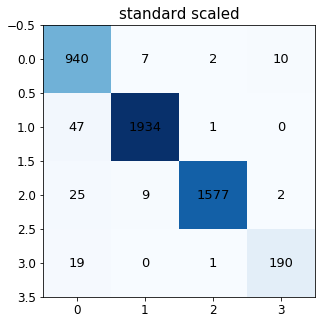

In [114]:
from sklearn.metrics import confusion_matrix

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train_y.flatten(), y_train_pred)

# Plot confusion matrix
plt.title("standard scaled", fontsize=15)
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center', fontsize=13)
#plt.xlabel(['dummy', 'wash', 'brush', 'eat', 'walk', 'stand', 'sit'])
# plt.xlabel("kmeans label")
# plt.ylabel("truth label")
plt.show()

In [119]:
from sklearn.svm import SVC
from micromlgen import port
svm_clf = SVC(random_state=42, gamma = 0.01).fit(scaled_x, train_y.flatten())
print(port(svm_clf))

#pragma once
/**
 * Compute kernel between feature vector and support vector.
 * Kernel type: rbf
 */
double compute_kernel(double x[16], ...) {
    va_list w;
    double kernel = 0.0;
    va_start(w, 16);
    for (uint16_t i = 0; i < 16; i++)
            kernel += pow(x[i] -  va_arg(w, double) , 2);
        kernel = exp(-0.01 * kernel);
    return kernel;
}
/**
 * Predict class for features vector
 */
int predict(double *x) {
    double kernels[834] = { 0 };
    double decisions[6] = { 0 };
    int votes[4] = { 0 };
        kernels[0] = compute_kernel(x,   -0.246591841  , 1.102968293  , 0.025782598  , -0.2040799  , -0.369160068  , -0.197966947  , 1.34626029  , 0.055592919  , -0.758376427  , 1.055904783  , -0.845032705  , -1.056832197  , 1.035778088  , -0.024234605  , 0.879884677  , -2.883284097 );
        kernels[1] = compute_kernel(x,   0.027174489  , 1.03840391  , -0.08716907  , -0.205910316  , -0.182353801  , 0.608368055  , 2.450058727  , 0.400988707  , -0.070681998  , 1.428247744 

# Feature Importance

## forest -> feature importance

In [168]:
import pandas as pd
import numpy as np

wash_data = pd.read_csv('./wash.csv', header=None)
brush_data = pd.read_csv('./brush.csv', header=None)
walk_data = pd.read_csv('./walk.csv',header=None)
eat_data = pd.read_csv('./eat.csv', header=None)
sit_data = pd.read_csv('./sit.csv', header=None)
stand_data = pd.read_csv('./stand.csv', header=None)
dummy_data = pd.read_csv('./dummy.csv', header=None)

dummy_data[16] = 0
wash_data[16] = 1
brush_data[16] = 2
eat_data[16] = 3
walk_data[16] = 0
sit_data[16] = 0
stand_data[16] = 0

dummy_arr = dummy_data.to_numpy()
wash_arr = wash_data.to_numpy()
brush_arr = brush_data.to_numpy()
walk_arr = walk_data.to_numpy()
eat_arr = eat_data.to_numpy()
sit_arr = sit_data.to_numpy()
stand_arr = stand_data.to_numpy()

tot_data = np.concatenate((dummy_arr, wash_arr, brush_arr, walk_arr, eat_arr, sit_arr, stand_arr))
X = tot_data[:,:-1]
y = tot_data[:,-1:]

In [169]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


from sklearn.model_selection import cross_val_predict
forest_pred = cross_val_predict(forest, X, y.flatten(), cv=skf)

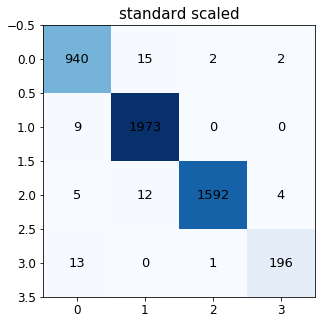

In [173]:
from sklearn.metrics import confusion_matrix

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y.flatten(), forest_pred)

# Plot confusion matrix
plt.title("standard scaled", fontsize=15)
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center', fontsize=13)
#plt.xlabel(['dummy', 'wash', 'brush', 'eat', 'walk', 'stand', 'sit'])
# plt.xlabel("kmeans label")
# plt.ylabel("truth label")
plt.show()

In [174]:
forest = ExtraTreesClassifier(n_estimators=250, random_state = 42)
forest.fit(X, y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

C:\Users\Jeong\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Feature ranking:
1. feature 3 (0.253744)
2. feature 1 (0.140095)
3. feature 12 (0.107594)
4. feature 11 (0.084314)
5. feature 4 (0.083975)
6. feature 2 (0.082975)
7. feature 10 (0.045335)
8. feature 0 (0.039686)
9. feature 13 (0.032867)
10. feature 9 (0.027254)
11. feature 7 (0.023607)
12. feature 14 (0.018485)
13. feature 5 (0.018116)
14. feature 8 (0.014632)
15. feature 6 (0.014395)
16. feature 15 (0.012925)


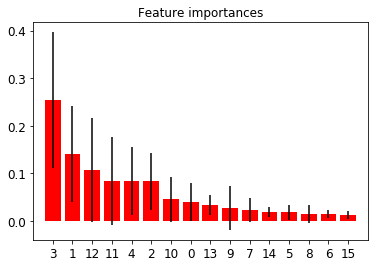

In [175]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## feature 를 줄여보자

* 6, 7, 8, 15

In [200]:
import pandas as pd
import numpy as np

wash_data = pd.read_csv('./wash.csv', header=None)
brush_data = pd.read_csv('./brush.csv', header=None)
walk_data = pd.read_csv('./walk.csv',header=None)
eat_data = pd.read_csv('./eat.csv', header=None)
sit_data = pd.read_csv('./sit.csv', header=None)
stand_data = pd.read_csv('./stand.csv', header=None)
dummy_data = pd.read_csv('./dummy.csv', header=None)

dummy_data[16] = 0
wash_data[16] = 1
brush_data[16] = 2
eat_data[16] = 3
walk_data[16] = 0
sit_data[16] = 0
stand_data[16] = 0

dummy_arr = dummy_data.to_numpy()
wash_arr = wash_data.to_numpy()
brush_arr = brush_data.to_numpy()
walk_arr = walk_data.to_numpy()
eat_arr = eat_data.to_numpy()
sit_arr = sit_data.to_numpy()
stand_arr = stand_data.to_numpy()

tot_data = np.concatenate((dummy_arr, wash_arr, brush_arr, walk_arr, eat_arr, sit_arr, stand_arr))
tot_data = np.delete(tot_data, (5, 6, 14, 15), axis=1)
X = tot_data[:,:-1]
y = tot_data[:,-1:]

In [201]:
X.shape

(4764, 12)

In [215]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


from sklearn.svm import SVC
svm_clf = SVC(random_state=42, gamma = 0.01, C=1.5)

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, X, y.flatten(), cv=skf)

from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y.flatten(), y_train_pred)
conf_mx


array([[ 931,   21,    1,    6],
       [   7, 1972,    3,    0],
       [  13,    9, 1585,    6],
       [  22,    0,    2,  186]], dtype=int64)

In [216]:
from sklearn.svm import SVC
from micromlgen import port
svm_clf = SVC(random_state=42, gamma = 0.01, C=1.5).fit(X_drop_feature, y.flatten())
print(port(svm_clf))

#pragma once
/**
 * Compute kernel between feature vector and support vector.
 * Kernel type: rbf
 */
double compute_kernel(double x[12], ...) {
    va_list w;
    double kernel = 0.0;
    va_start(w, 12);
    for (uint16_t i = 0; i < 12; i++)
            kernel += pow(x[i] -  va_arg(w, double) , 2);
        kernel = exp(-0.01 * kernel);
    return kernel;
}
/**
 * Predict class for features vector
 */
int predict(double *x) {
    double kernels[522] = { 0 };
    double decisions[6] = { 0 };
    int votes[4] = { 0 };
        kernels[0] = compute_kernel(x,   10.38  , 9.91  , 1.89  , 2.42  , 0.28  , 0.05  , 0.01  , 0.07  , 0.66  , 0.09  , 0.65  , -0.04 );
        kernels[1] = compute_kernel(x,   10.19  , 9.93  , -1.08  , 0.37  , 1.15  , 0.69  , 1.47  , 0.63  , 0.46  , 0.74  , 0.37  , -0.63 );
        kernels[2] = compute_kernel(x,   10.43  , 9.8  , 1.7  , 1.22  , 0.78  , -1.19  , -3.87  , 1.28  , -0.76  , -0.98  , 0.83  , 0.91 );
        kernels[3] = compute_kernel(x,   10.41  , 7.54  , 

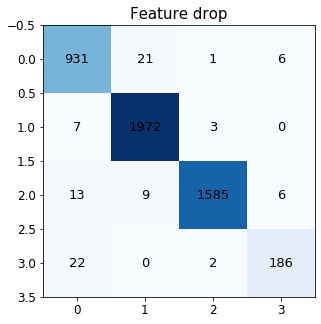

In [214]:
from sklearn.metrics import confusion_matrix

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y.flatten(), y_train_pred)
conf_mx
# Plot confusion matrix
plt.title("Feature drop", fontsize=15)
plt.imshow(conf_mx,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(conf_mx):
    plt.text(j, i, z, ha='center', va='center', fontsize=13)
#plt.xlabel(['dummy', 'wash', 'brush', 'eat', 'walk', 'stand', 'sit'])
# plt.xlabel("kmeans label")
# plt.ylabel("truth label")
plt.show()